In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


I should just combine all the ROIs and protoclusters together at the protostream level. Each protostream corresponds to a single patch. Remove the duplicates, then repeat my search.

Goals: 
- Repeat search on each patch 
- Optimize SR definitions
- Get CWoLa NN scores
- Scan in both coordinates!

In [14]:
file = np.load("streams_lwr5_lwtheta3_pcsig8.pkl", allow_pickle=True)

This is a file containing 263 stream candidates. 

In [ ]:
dir(file[0])

In [21]:
len(file) # number of stream candidates

263

There are ~1 protostreams per patch, and significance is the significance of each protostream. Should be sorted by significance.

First 6 are the known streams: GD-1 etc. They also happen to be the most significance. Out of the top 20, ~5 are Sagittarius. The rest are potentially new streams!

Each protoSTREAM is made up of protoCLUSTERS. `pclist` is the list of protoclusters. They're not independent of each other. `line_sigma` is the most significant protocluster, which is what we call the protostream significance. (Wouldn't be correct to combine these in quadrature, because of their lack of independence)

In [27]:
file[0].protostreams 
# patches consisting of protostreams that combine to make the overall stream candidate

array([<protoclustering.Protostream object at 0x7feed3a92af0>,
      dtype=object)

In [29]:
dir(file[0].protostreams[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dec',
 'line_sigma',
 'pclist',
 'ra']

In [31]:
file[0].protostreams[0].pclist

In [32]:
dir(file[0].protostreams[0].pclist[0])

['ROIlist',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dec',
 'highRstars',
 'line_ind',
 'line_sigma',
 'line_stars',
 'ra']

Each protocluster is made up of ROIs (both coordinates in proper motion space). High-R stars is the concatenation of the top 100 stars from each ROI. Each ROI comes from an independent run of ANODE. They don't delete the duplicates! 

ROIs all come from the same patch.

In [36]:
file[0].protostreams[0].pclist[0].highRstars.shape # n_ROIs*100

(400, 12)

In [53]:
dir(file[0].protostreams[0].pclist[0].ROIlist[0])

['Rvals',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'b',
 'counts',
 'dataset',
 'dec',
 'fitresults',
 'gcresults',
 'gd1stars_mask',
 'highRstars',
 'knownstreams',
 'l',
 'line_r',
 'line_sigma',
 'line_theta',
 'linestars',
 'pmlat',
 'pmlon',
 'pmuse',
 'ra',
 'sourceids']

In [68]:
file[0].protostreams[0].pclist[0].ROIlist[0].knownstreams

{'GD1': array([[ 98.14391791,  55.16165394, 218.72588186,  56.70245259,
          -7.20064246,  -1.99122013],
        [ 98.99359431,  54.37169044, 219.04668903,  57.61570571,
         -10.4229537 ,  -1.67370941],
        [ 99.17994527,  55.70858903, 217.26401385,  56.6862524 ,
          -8.59647195,  -2.27812067],
        ...,
        [120.24743139,  59.18345883, 195.44671589,  57.89081912,
          -7.49226582,  -4.86959355],
        [120.36453267,  59.05505631, 195.35236735,  58.02346082,
          -7.71972082,  -5.03910482],
        [120.48531398,  59.81177971, 195.13497252,  57.27321342,
          -9.58177464,  -5.4866737 ]])}

In [73]:
file[0].protostreams[0].pclist[0].ROIlist[0].knownstreams

{'GD1': array([[ 98.14391791,  55.16165394, 218.72588186,  56.70245259,
          -7.20064246,  -1.99122013],
        [ 98.99359431,  54.37169044, 219.04668903,  57.61570571,
         -10.4229537 ,  -1.67370941],
        [ 99.17994527,  55.70858903, 217.26401385,  56.6862524 ,
          -8.59647195,  -2.27812067],
        ...,
        [120.24743139,  59.18345883, 195.44671589,  57.89081912,
          -7.49226582,  -4.86959355],
        [120.36453267,  59.05505631, 195.35236735,  58.02346082,
          -7.71972082,  -5.03910482],
        [120.48531398,  59.81177971, 195.13497252,  57.27321342,
          -9.58177464,  -5.4866737 ]])}

In [69]:
file[1].protostreams[0].pclist[0].ROIlist[0].knownstreams

{'Gaia1': array([[298.81092982,  52.36400092, 190.30213348, -10.42587696,
         -13.52727273, -18.86462882],
        [294.94718032,  47.2244159 , 187.24678906, -15.29896515,
         -14.54545455, -20.7860262 ],
        [302.70580751,  55.25480319, 192.72946015,  -7.61671606,
         -13.81818182, -17.6419214 ],
        ...,
        [294.36123224,  47.04569965, 186.81245632, -15.42312832,
         -14.83636364, -20.08733624],
        [301.26759732,  54.16154228, 191.8737645 ,  -8.6974633 ,
         -14.54545455, -18.16593886],
        [302.21775129,  54.63606487, 192.44183932,  -8.23336617,
         -12.21818182, -17.6419214 ]])}

In [70]:
file[2].protostreams[0].pclist[0].ROIlist[0].knownstreams

{'Leiptr': array([[-152.37647971,  -33.00794758,   70.9366298 ,  -10.33194744,
            8.7881189 ,  -10.60569775],
        [-153.21197609,  -33.60520581,   70.08102624,   -9.9645975 ,
            9.37035545,  -11.31898158],
        [-153.28300137,  -33.32822326,   70.30708934,   -9.78958583,
            8.89506031,  -10.96272896],
        [-153.58617998,  -32.84242044,   70.6351144 ,   -9.34697634,
            9.34767091,   -9.94685235],
        [-153.86774577,  -32.45583771,   70.8787967 ,   -8.96256399,
            9.86941535,  -11.38981805],
        [-154.77775708,  -34.0418246 ,   69.09814845,   -8.99362082,
            8.72026427,  -10.73301141],
        [-157.27172462,  -34.55277944,   67.68318162,   -7.39848944,
            8.24192557,  -10.85466371],
        [-158.49463057,  -34.2588216 ,   67.46218474,   -6.37073952,
            8.1227057 ,   -9.98872938],
        [-159.00429751,  -34.83465176,   66.75112786,   -6.27942375,
            8.43600442,  -10.91383556],
        [

In [54]:
dir(file[0].protostreams[0].pclist[0])

['ROIlist',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dec',
 'highRstars',
 'line_ind',
 'line_sigma',
 'line_stars',
 'ra']

In [58]:
column_names = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", "parallax", "parallax_err"]
array = file[0].protostreams[0].pclist[0].highRstars
mask = file[0].protostreams[0].pclist[0].line_stars
df = pd.DataFrame(array, columns = column_names)
df["line_stars"] = mask

In [56]:
len(mask)

400

In [57]:
df.shape

(400, 12)

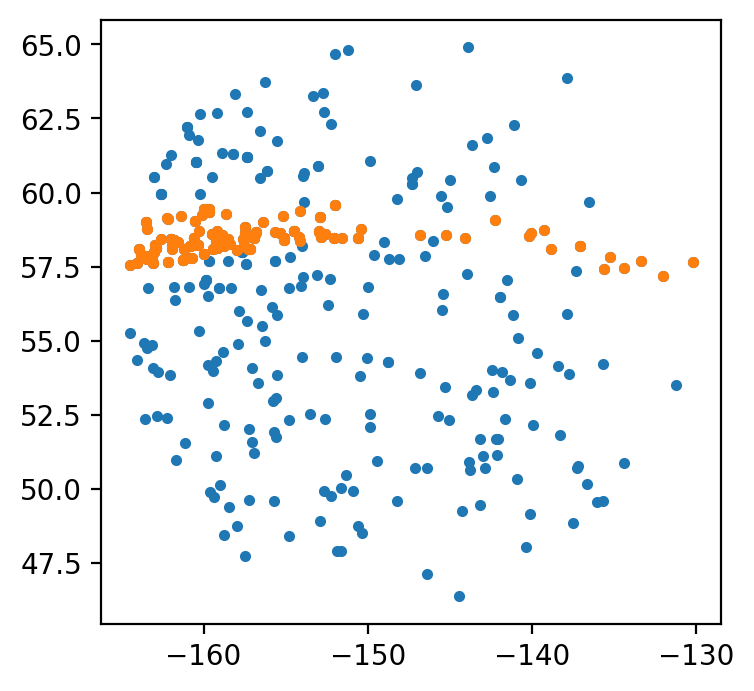

In [59]:
plt.figure(figsize=(4,4), dpi=200)
plt.scatter(df.α, df.δ, marker='.');
plt.scatter(df[df.line_stars].α, df[df.line_stars].δ, marker='.');

Which SR did this come from?

In [60]:
file[0].protostreams[0].pclist[0].ROIlist

In [61]:
dir(file[0].protostreams[0].pclist[0].ROIlist[0])

['Rvals',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'b',
 'counts',
 'dataset',
 'dec',
 'fitresults',
 'gcresults',
 'gd1stars_mask',
 'highRstars',
 'knownstreams',
 'l',
 'line_r',
 'line_sigma',
 'line_theta',
 'linestars',
 'pmlat',
 'pmlon',
 'pmuse',
 'ra',
 'sourceids']

In [62]:
file[0].protostreams[0].pclist[0].ROIlist[0].pmlat # lower edge of SR
# so SR = this + 6

-8

In [63]:
file[0].protostreams[0].pclist[0].ROIlist[0].pmlon # lower edge of SR
# so SR = this + 6

-12.0

In [64]:
file[0].protostreams[0].pclist[0].ROIlist[0].pmuse # which one was used for ANODE

'lon'

In [37]:
len(file[0].protostreams[0].pclist[0].ROIlist) # n_ROIs

4

In [22]:
file[0].significance

83.0399509445921

In [24]:
[f.significance for f in file]

[83.0399509445921,
 46.92090963721899,
 29.181897257000408,
 29.07226013879935,
 22.62939369336437,
 22.485027814435725,
 19.854865921306626,
 17.344789618612396,
 16.82911791365057,
 16.564889504563066,
 14.687178322069055,
 14.67926289345861,
 13.856950180434712,
 13.72188132697383,
 13.522154801806222,
 13.097719867861972,
 12.990222013156759,
 12.435425248993992,
 12.413316419770466,
 12.197071362280235,
 11.886290595455327,
 11.60135391318026,
 11.193807346297298,
 11.061017608432262,
 10.610383940632268,
 10.499752071334017,
 10.46058093463384,
 10.437590566203081,
 10.340019255189008,
 10.338634334106699,
 10.214437868307808,
 10.178201004353278,
 10.149439838466561,
 10.116771025196455,
 10.06610363596783,
 10.010780810339861,
 9.824318666675653,
 9.804702111587398,
 9.796566417650599,
 9.784355707782622,
 9.762552341845444,
 9.762142511012144,
 9.758470375037977,
 9.741427976371659,
 9.68043825277145,
 9.675427226289914,
 9.634469923642994,
 9.565860445581663,
 9.5488082842159